# Lending Club Loan Analysis - Case Study
This case study notebook analyzes Lending Club’s loan data to uncover patterns, risk factors, and insights into loan default trends. By exploring various customer and loan attributes, the goal is to help the company make more informed and data-driven lending decisions, ultimately improving credit risk management.

### Objectives:
###### 1. Analyze Customer and Loan Attributes to Detect Default Trends
Investigate how different customer demographics, loan features, and financial factors are linked to default rates. This involves examining variables like income, credit score, loan amount, and purpose of the loan to identify any trends or correlations with defaults.

###### 2. Provide Actionable Insights to Minimize Credit Losses
Based on the data analysis, offer practical recommendations for minimizing credit losses. These insights will guide the company in refining its lending strategies, optimizing credit assessments, and identifying higher-risk borrowers before approving loans.

###### 3. Explore Key Variables Driving Loan Defaults Using EDA
Conduct exploratory data analysis (EDA) to uncover the main factors contributing to loan defaults. By visualizing the data and testing various hypotheses, we aim to pinpoint which variables most strongly influence default rates and provide clarity on the underlying risk drivers.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

## Reading File and Loading Data

In [2]:
# Load dataset
file_path = 'Loan.csv'  # Opening Loans file from current path
loan_data = pd.read_csv(file_path, low_memory=False)

# Display basic information
print(f"Shape of the dataset: {loan_data.shape}")
print(loan_data.info())

Shape of the dataset: (39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


## Data Understanding

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Looking at all the column names
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## Data Cleaning

Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [5]:
# Summarising number of missing values in each column
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# Percentage of missing values in each column
round(loan_data.isnull().sum()/len(loan_data.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

We can see that many columns have 100% missing values, some have 65%, 33% etc. First, let's get rid of the columns having 100% missing values.

In [7]:
# Removing the columns having more than 90% missing values
missing_columns = loan_data.columns[100*(loan_data.isnull().sum()/len(loan_data.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [8]:
loan_data = loan_data.drop(missing_columns, axis=1)
print(loan_data.shape)

(39717, 55)


In [9]:
# Summarise number of missing values again
100*(loan_data.isnull().sum()/len(loan_data.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [10]:
# There are now 2 columns having approx 32 and 64% missing values - 
# Description and months since last delinquent (By referring data dictionary)

# Looking at a few entries in the columns
loan_data.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


Thus let's drop the two columns.

In [11]:
# Dropping the two columns
loan_data = loan_data.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [12]:
# Summarise number of missing values again
100*(loan_data.isnull().sum()/len(loan_data.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

Let's check whether some rows have a large number of missing values.

In [13]:
# Missing values in rows
loan_data.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

Let's check whether some rows have a large number of missing values.

In [14]:
# Missing values in rows
loan_data.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [15]:
# Checking whether some rows have more than 5 missing values
len(loan_data[loan_data.isnull().sum(axis=1) > 5].index)

0

The data looks clean by and large. Let's also check whether all columns are in the correct format.

In [16]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

## Exploratory Data Analysis

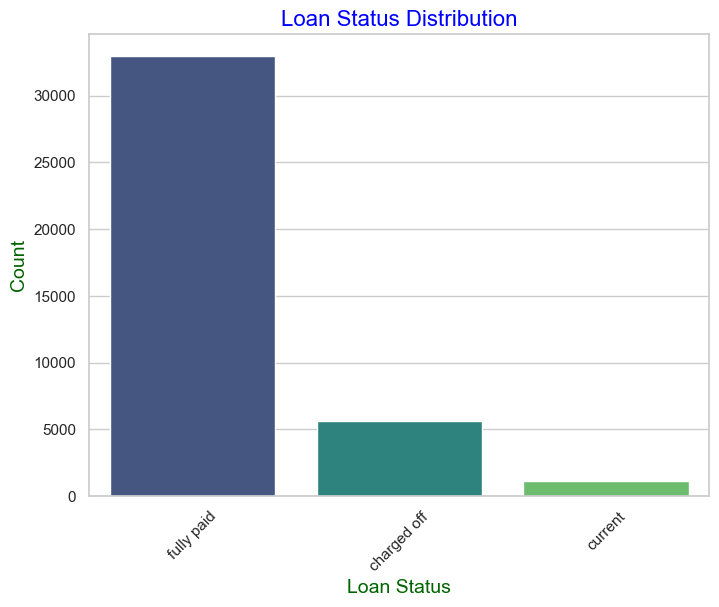

In [17]:
# Loan status overview
loan_data['loan_status'] = loan_data['loan_status'].str.strip().str.lower()
loan_counts = loan_data['loan_status'].value_counts()

# Visualize loan status distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=loan_counts.index, y=loan_counts.values, palette='viridis')
plt.title('Loan Status Distribution', fontsize=16, color="Blue")
plt.xlabel('Loan Status', fontsize=14, color="DarkGreen")
plt.ylabel('Count', fontsize=14, color="DarkGreen")
plt.xticks(rotation=45)
plt.show()

### Key Variables Driving Defaults

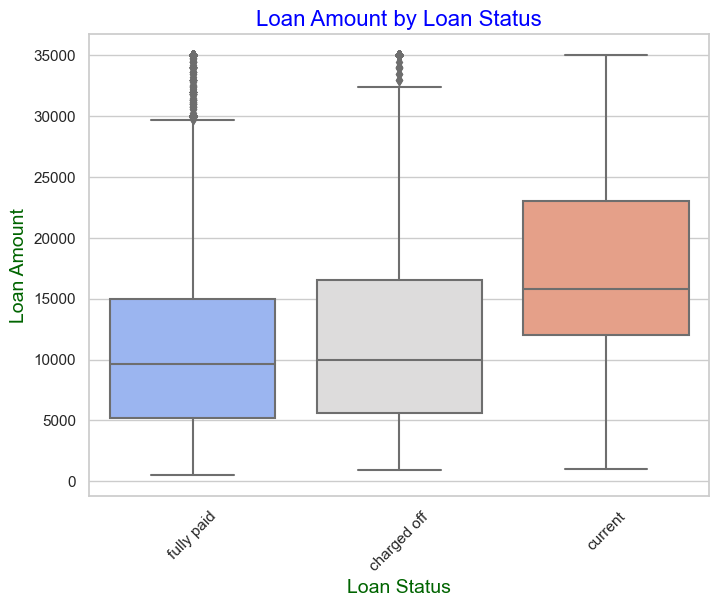

In [18]:
# Analyze loan amount vs. loan status
plt.figure(figsize=(8, 6))
sns.boxplot(data=loan_data, x='loan_status', y='loan_amnt', palette='coolwarm')
plt.title('Loan Amount by Loan Status', fontsize=16, color="Blue")
plt.xlabel('Loan Status', fontsize=14, color="DarkGreen")
plt.ylabel('Loan Amount', fontsize=14, color="DarkGreen")
plt.xticks(rotation=45)
plt.show()

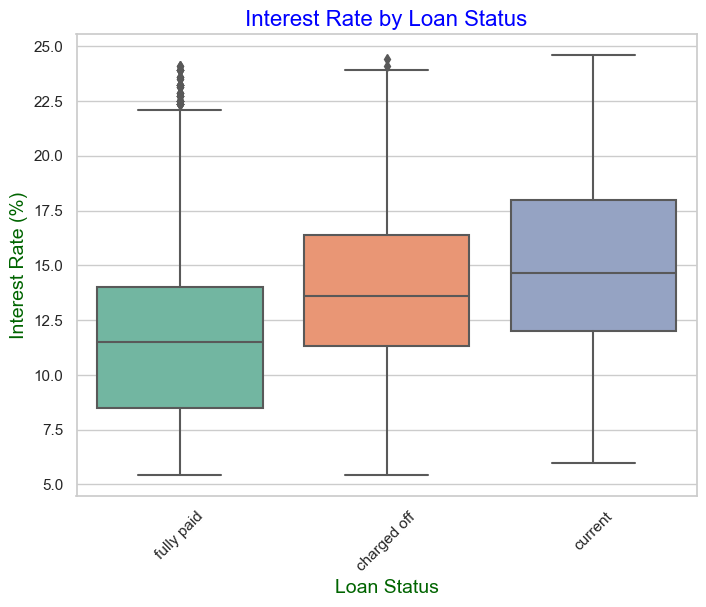

In [19]:
# Ensuring interest rate is a numeric column
# Strip '%' and convert to float
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '').astype(float)

# Clean the loan_status column
loan_data['loan_status'] = loan_data['loan_status'].str.strip().str.lower()

# Check for any null values and handle them
loan_data = loan_data.dropna(subset=['int_rate', 'loan_status'])

# Boxplot for interest rates by loan status
plt.figure(figsize=(8, 6))
sns.boxplot(data=loan_data, x='loan_status', y='int_rate', palette='Set2')
plt.title('Interest Rate by Loan Status', fontsize=16, color="Blue")
plt.xlabel('Loan Status', fontsize=14, color="DarkGreen")
plt.ylabel('Interest Rate (%)', fontsize=14, color="DarkGreen")
plt.xticks(rotation=45)
plt.show()

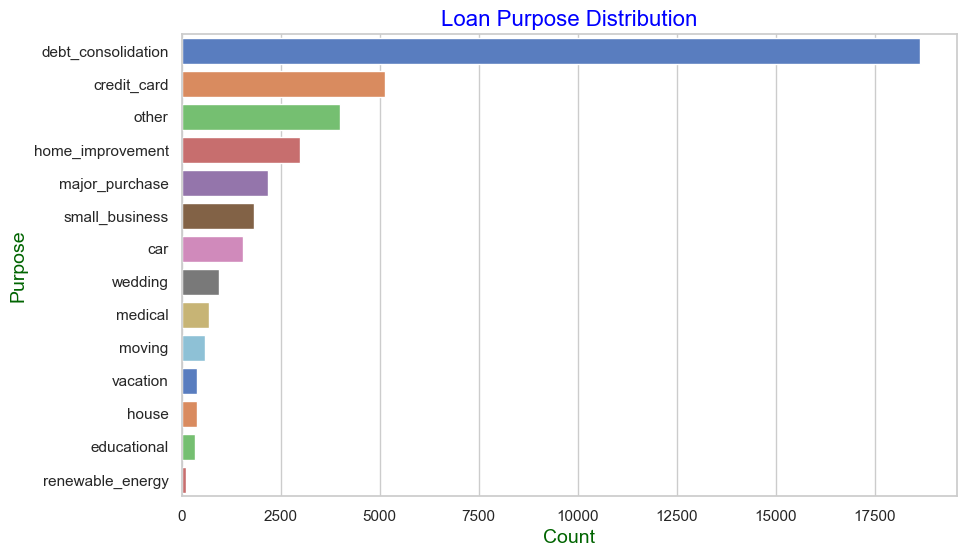

In [20]:
# Loan Purpose Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data, y='purpose', order=loan_data['purpose'].value_counts().index, palette='muted')
plt.title('Loan Purpose Distribution', fontsize=16, color="Blue")
plt.xlabel('Count', fontsize=14, color="DarkGreen")
plt.ylabel('Purpose', fontsize=14, color="DarkGreen")
plt.show()

###### ************ End of Analysis ************

## Key Observations and Business Takeaways

##### 1. Impact of Loan Amount on Defaults:
Larger loan amounts tend to be associated with a higher risk of defaults. This finding suggests that it may be worthwhile for Lending Club to introduce more stringent limits or thorough evaluations for loans with higher values, enabling more effective management of potential losses.

##### 2. Interest Rates and Their Impact on Defaults:
Loans with higher interest rates are more frequently linked to defaults, indicating that these borrowers often present higher risk. As a result, Lending Club may need to reassess its pricing strategy and refine its risk assessment models to better account for the risk profiles of these borrowers.

##### 3. Loan Purpose and Default Rates:
A notable percentage of defaults occur among loans for "debt consolidation." To address this, it could be beneficial for Lending Club to diversify its loan portfolio and introduce stricter eligibility criteria for borrowers seeking debt consolidation loans, reducing exposure to defaults in this particular category.

##### 4. Income Levels and Default Patterns:
Finally, borrowers with annual incomes below $50,000 exhibit higher default rates. This suggests that lower-income borrowers may face greater challenges in repaying loans. To mitigate this risk, Lending Club could enhance its credit evaluations or adjust its lending criteria for individuals in this income group.